In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import statsmodels.api as sm
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler
from statsmodels.stats import weightstats as stests
sns.set(style="whitegrid", palette="pastel", color_codes=True)

#### Link to Dataset: https://www.kaggle.com/hugodarwood/epirecipes

In [11]:
df = pd.read_csv('cleaned_epi.csv')

In [12]:
df.head()

,title,rating,calories,protein,fat,sodium,appetizer,dessert,dinner,low carb,low sugar,meat,vegan,vegetarian,snack,alcoholic,holidays,SqrtCalories,LogProtein,SqrtFat
0,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.074860,2.944439,4.795832
1,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.845233,1.945910,2.645751
2,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,23.388031,3.044522,5.656854
3,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13.038405,2.079442,3.162278
4,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.535688,3.178054,6.403124


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11713 entries, 0 to 11712
Data columns (total 19 columns):
rating          11713 non-null float64
calories        11713 non-null float64
protein         11713 non-null float64
fat             11713 non-null float64
sodium          11713 non-null float64
appetizer       11713 non-null float64
dessert         11713 non-null float64
dinner          11713 non-null float64
low carb        11713 non-null float64
low sugar       11713 non-null float64
meat            11713 non-null float64
vegan           11713 non-null float64
vegetarian      11713 non-null float64
snack           11713 non-null float64
alcoholic       11713 non-null float64
holidays        11713 non-null int64
SqrtCalories    11713 non-null float64
LogProtein      11713 non-null float64
SqrtFat         11713 non-null float64
dtypes: float64(18), int64(1)
memory usage: 1.7 MB


In [8]:
df.describe()

,rating,calories,protein,fat,sodium,appetizer,dessert,dinner,low carb,low sugar,meat,vegan,vegetarian,snack,alcoholic,holidays,SqrtCalories,LogProtein,LogFat,SqrtFat
count,11713.000000,11713.00000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000
mean,4.171007,343.44139,12.212243,18.097669,499.391104,0.075216,0.203876,0.098096,0.016648,0.000512,0.010928,0.099291,0.398702,0.000768,0.026381,0.212243,17.629133,2.109930,2.562402,3.832111
std,0.519868,205.89596,12.678629,13.979213,2227.539673,0.263750,0.402895,0.297457,0.127955,0.022628,0.103969,0.299066,0.489652,0.027710,0.160272,0.408913,5.714705,1.012601,1.040016,1.847399
min,3.125000,11.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.316625,0.000000,0.000000,0.000000
25%,3.750000,192.00000,3.000000,7.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.856406,1.386294,2.079442,2.645751
50%,4.375000,300.00000,7.000000,15.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.320508,2.079442,2.772589,3.872983
75%,4.375000,473.00000,18.000000,26.000000,592.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,21.748563,2.944439,3.295837,5.099020
max,5.000000,1047.00000,50.000000,60.000000,132025.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.357379,3.931826,4.110874,7.745967


In [13]:
df.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', 'appetizer',
       'dessert', 'dinner', 'low carb', 'low sugar', 'meat', 'vegan',
       'vegetarian', 'snack', 'alcoholic', 'holidays', 'SqrtCalories',
       'LogProtein', 'SqrtFat'],
      dtype='object')

## 1.) Is the distribution of each feature normal?

sodium


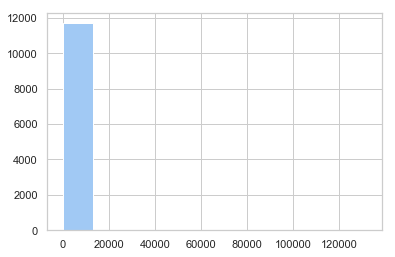

appetizer


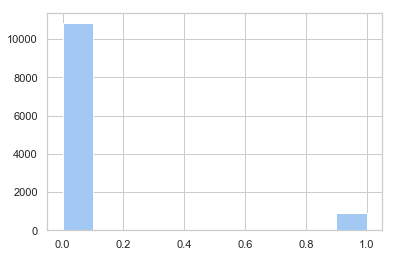

dessert


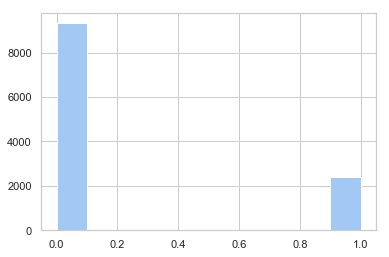

dinner


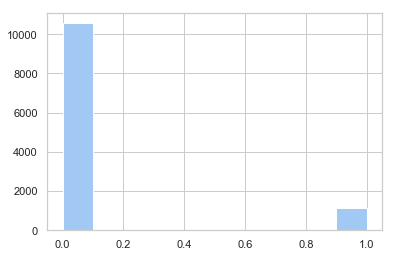

low carb


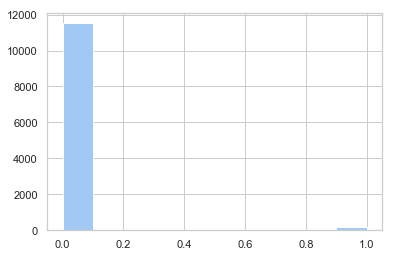

low sugar


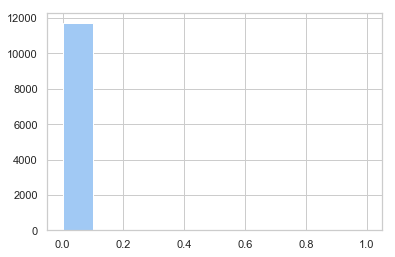

meat


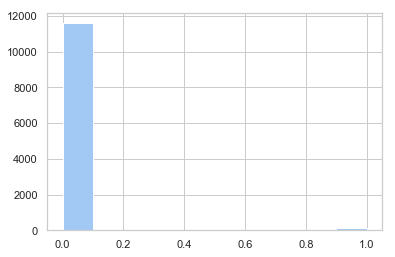

vegan


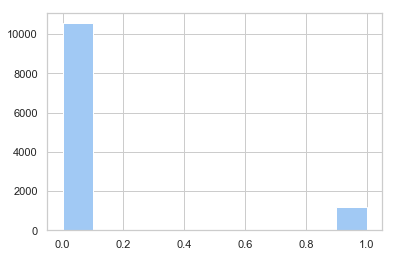

vegetarian


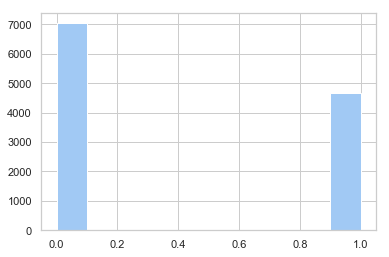

snack


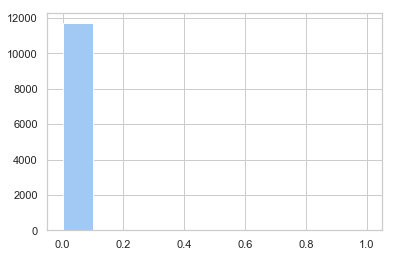

alcoholic


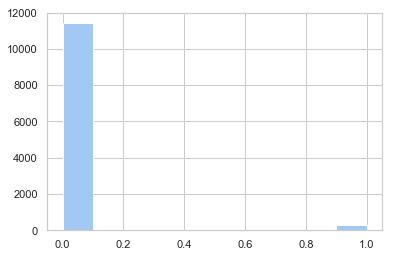

holidays


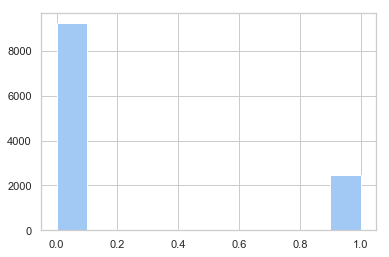

SqrtCalories


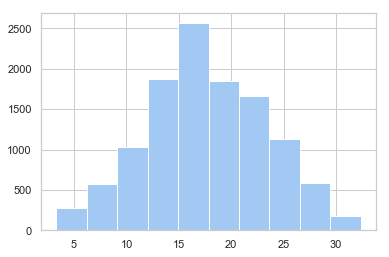

LogProtein


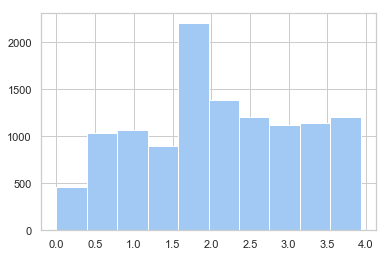

SqrtFat


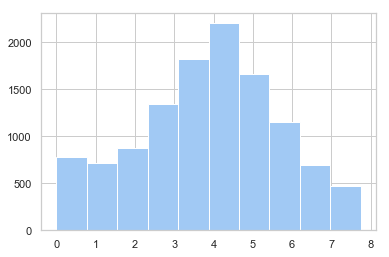

In [63]:
features = ['sodium', 'appetizer',
       'dessert', 'dinner', 'low carb', 'low sugar', 'meat', 'vegan',
       'vegetarian', 'snack', 'alcoholic', 'holidays', 'SqrtCalories',
       'LogProtein', 'SqrtFat']

for i in features:
    print(i)
    plt.hist(df[i])
    plt.show()

In [57]:
df.drop('title',axis=1,inplace=True)

In [58]:
# Standard Scaler to normalize nutritional data
ss = StandardScaler()

df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

calories


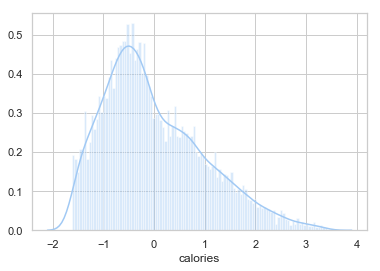

4.73771188111533e-187
protein


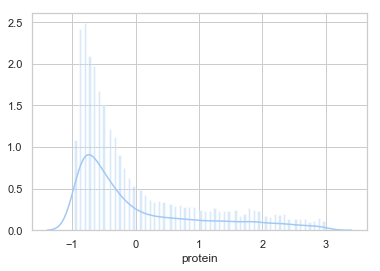

0.0
fat


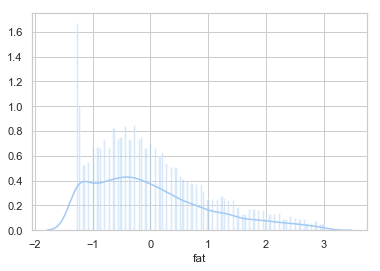

2.729708696958359e-225


In [74]:
features = ['calories',
       'protein', 'fat']

for i in features:
    print(i)
    n_data = len(df_scaled[i])
    n_bins = int(np.sqrt(n_data))
    ax = sns.distplot(df_scaled[i],bins=n_bins)
    plt.show()
    stat,p = normaltest(df_scaled[i])
    print(p)

SqrtCalories


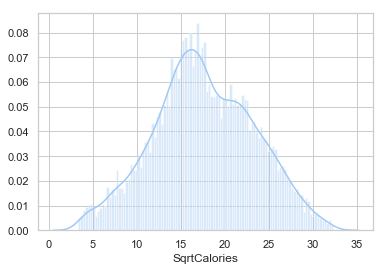

1.1531208839206821e-28
LogProtein


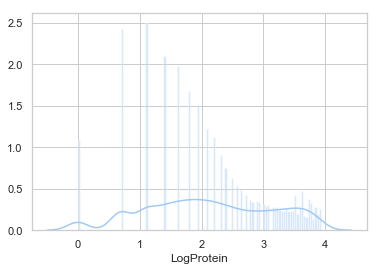

2.669705303831394e-240
SqrtFat


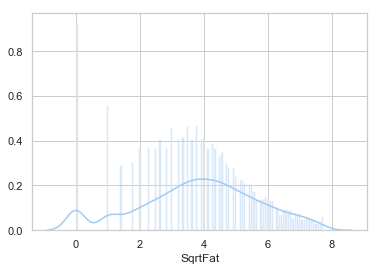

3.261524030332051e-52


In [76]:
#Compare normality tests after scaling to normality tests of unscaled data which I transformed

features = ['SqrtCalories',
       'LogProtein', 'SqrtFat']

for i in features:
    print(i)
    n_data = len(df_scaled[i])
    n_bins = int(np.sqrt(n_data))
    ax = sns.distplot(df[i],bins=n_bins)
    plt.show()
    stat,p = normaltest(df[i])
    print(p)

After scaling the data, the fat feature is less normal than when I transformed the column to SqrtFat. 

The p-value of the protein feature normality test after scaling is slightly higher than the transformation, LogProtein. 

The p-value of the calories feature normality test after scaling is lower than the transformation, SqrtCalories.

In [ ]:
# Bootstrap to test normality of Vegetarian and Holiday features, as those are the two binary features with the most
# amount of 1's

In [78]:
#functions

#Generate 1D replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#Generate multiple replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

Vegetarian Mean Bootstrapping

0.004460452150776912


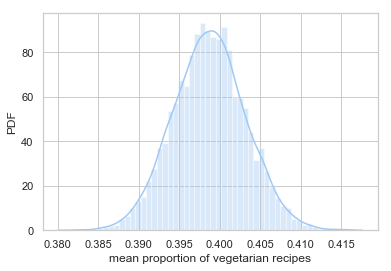

In [85]:
veg = df['vegetarian']

## Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(veg,np.mean,10000)

# standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = sns.distplot(bs_replicates, bins=50)
_ = _.set(xlabel='mean proportion of vegetarian recipes', ylabel='PDF')

# Show the plot
plt.show()

According to the histogram, the probabilistic estimate of the mean proportion of vegetarian recipes is normal.

0.0037594319219553555


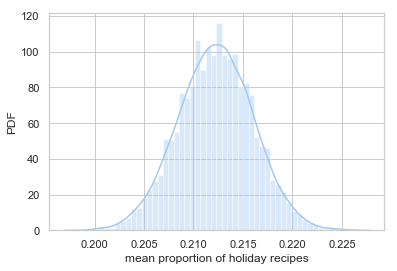

In [86]:
hols = df['holidays']

## Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(hols,np.mean,10000)

# standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = sns.distplot(bs_replicates, bins=50)
_ = _.set(xlabel='mean proportion of holiday recipes', ylabel='PDF')

# Show the plot
plt.show()

Similarly, the probablistic estimate of the mean proportion of holiday recipes is normal as well.

While the nutritional features do not pass the Normal Test even after transforming them with either square roots or log + 1, or after using Standard Scaler, their distributions look as normal as they're going to get with these transformations/use of SS. 

As for the two focus binary features, we find that the probablistic estimates of their mean proportions are normal through boostrapping replicates of the feature means (which, because the features are binary, are the feature proportions as well).

## Is the sample size large? Are the observations independent?

In [90]:
df.shape

(11713, 19)

The sample size is sufficiently large where the Central Limit Theorem applies.  The observations are independent as the features of one recipe are not dependent on the features of any other recipe in the sample. The z-test will be used to test the hypothesis.

## What are the null and alternate hypotheses?

### Calories

Looking at the swarmplots in the Data Story notebook, it looked as though the rating goes up with the number of calories--but only up to a 4.375 rating.  We will confirm a difference between mean calories for a 4.375 rating and for a 5.0 rating

*H0*: The mean number of calories is the same for recipes with a 4.375 and a 5.0 rating.

*H1*: The mean number of calories is different for recipes with a 4.375 and a 5.0 rating.

*a* = 0.05

In [ ]:
#split datasets based on rating (4.375 and 5)

df4 = df.copy()
df4 = df4[df4.rating==4.375]

df5 = df.copy()
df5 = df5[df5.rating==5.0]

In [110]:
cals4 = df4['SqrtCalories']
cals5 = df5['SqrtCalories']

#Calculate Means
mean_4 = np.mean(cals4)
print('4.375 Rating mean: ',mean_4)            
            
mean_5 = np.mean(cals5)
print('5 Rating mean: ',mean_5)

4.375 Rating mean:  18.08525407062734
5 Rating mean:  16.558942615122774


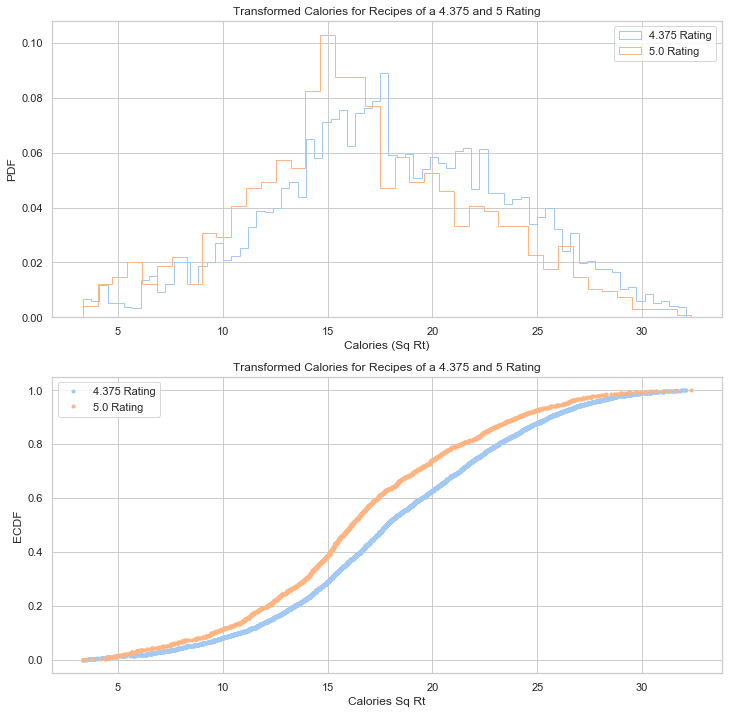

In [123]:
#Visualization

c4_bins = int(np.sqrt(len(cals4)))
c5_bins = int(np.sqrt(len(cals5)))

#Compute ECDFs
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# ECDF 
c4_x, c4_y = ecdf(cals4)
c5_x, c5_y = ecdf(cals5)


# Plot
fig = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = plt.hist(cals4, bins = c4_bins, density=True, histtype='step')
_ = plt.hist(cals5, bins = c5_bins, density=True, histtype='step')
_ = plt.xlabel('Calories (Sq Rt)')
_ = plt.ylabel('PDF')
_ = plt.title('Transformed Calories for Recipes of a 4.375 and 5 Rating')
_ = plt.legend(('4.375 Rating', '5.0 Rating'))

_ = plt.subplot(2,1,2)
_ = plt.plot(c4_x, c4_y, marker = '.',linestyle='none')
_ = plt.plot(c5_x, c5_y, marker = '.',linestyle='none')
_ = plt.xlabel('Calories Sq Rt')
_ = plt.ylabel('ECDF')
_ = plt.title('Transformed Calories for Recipes of a 4.375 and 5 Rating')
_ = plt.legend(('4.375 Rating', '5.0 Rating'))

In [115]:
print('Rating 4.375 Calories Standard Deviation: ', np.std(cals4))
print('Rating 5.0 Calories Standard Deviation: ', np.std(cals5))

Rating 4.375 Calories Standard Deviation:  5.6394876901010305
Rating 5.0 Calories Standard Deviation:  5.488225321249683


Looking at the histogram and the observed difference of means, the mean number of calories for recipes with 4.375 rating are slightly higher than that of recipes with a 5.0 rating. The standard deviations are very close, though 5.0 rated recipes have a *slightly* smaller value, indicating a marginally smaller range of values.

In [116]:
#Null Hypothesis: There is no difference of means of calories between 4.375 and 5.0 rated recipes

# Function to create permutation sample from two data sets
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Function to draw N size permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Test statistic
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of observed mean calories
diff_means = diff_of_means(cals4,cals5)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(cals4,cals5,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(abs(perm_replicates) >= abs(diff_means)) / len(perm_replicates)

print('Observed difference:',diff_means)
print('P-Value:',p)

Observed difference: 1.5263114555045654
P-Value: 0.0


The p-value is 0.0, indicating that in 10,000 observations the probability of obtaining a difference of means as or more extreme than the observed difference is extremely unlikely. 

#### Statistical significance for α = .05

The p-value is smaller than the stated alpha of 0.05, meaning we reject the null hypothesis that there is no mean difference between the number of calories in 4.375-rated and 5.0-rated recipes.